<a href="https://colab.research.google.com/github/wdelugar/AnalysticsAndVisuals/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [75]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [76]:
%pip install --upgrade plotly

### Import Statements

In [124]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import calendar

### Notebook Presentation

In [78]:
pd.options.display.float_format = '{:.2f}'.format

### Load the Data

In [79]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [80]:
df_data.shape
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [81]:
df_data.isna()
df_data.duplicated(keep=False)
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [82]:
df_data.duplicated().values.any()
df_data.drop_duplicates()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [83]:
df_data.dropna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


## Descriptive Statistics

In [84]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.00,4324.00
mean,2161.50,2161.50
std,1248.38,1248.38
min,0.00,0.00
25%,1080.75,1080.75
50%,2161.50,2161.50
75%,3242.25,3242.25
max,4323.00,4323.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [85]:
org = df_data.groupby(['Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
org.sort_values(by='Mission_Status', inplace=True)


In [86]:
h_bar = px.bar(x=org.Mission_Status,
               y=org.Organisation,
               orientation='h',
               color=org.Mission_Status,
               color_continuous_scale='Viridis',
               title='Number of launches per Company')
h_bar.update_layout(xaxis_title='Number of Launches',
                    yaxis_title='Company',
                    coloraxis_showscale=False)
h_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [87]:
cat_status = df_data.groupby(['Rocket_Status'], as_index=False,).agg({'Organisation': pd.Series.count})
cat_status.sort_values('Rocket_Status', ascending=False, inplace=True)

In [88]:
v_bar_split = px.bar(x = cat_status.Rocket_Status,
                     y=cat_status.Organisation,
                     color=cat_status.Rocket_Status,
                     title='Active Vs Retired Rockets')
v_bar_split.update_layout(xaxis_title='Status',
                          yaxis_title='Number of Rockets')
v_bar_split.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [89]:
mission_status = df_data.groupby(['Mission_Status'], as_index=False,).agg({'Organisation': pd.Series.count})
mission_status.sort_values('Mission_Status', ascending=False, inplace=True)

In [90]:
v_bar_split = px.bar(x = mission_status.Mission_Status,
                     y=mission_status.Organisation,
                     color=mission_status.Mission_Status,
                     title='Rockets Mission Status')
v_bar_split.update_layout(xaxis_title='Status',
                          yaxis_title='Number of Rockets')
v_bar_split.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [91]:

df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


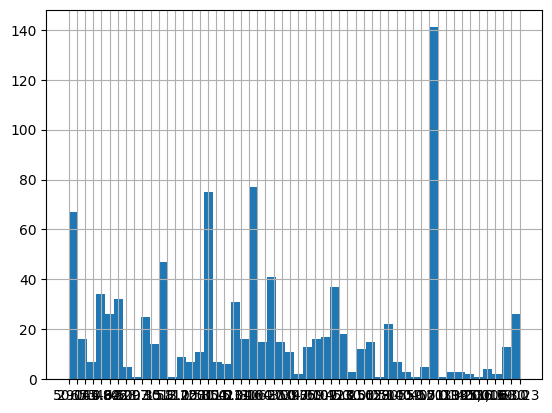

In [92]:
hist = df_data['Price'].hist(bins=50)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [93]:
def convert_country_to_alpha3(country_name):
    try:
        return countries.get(country_name).alpha3
    except KeyError:
        return None  # Return None for invalid or missing country names


df_data["Country"] = df_data.Location.str.split(",").apply(lambda x: x[-1])
df_data["Country"] = df_data["Country"].str.strip()
df_data.loc[df_data["Country"] == "Russia", "Country"] = "RUSSIAN FEDERATION"
df_data.loc[df_data["Country"] == "New Mexico", "Country"] = "United States"
df_data.loc[df_data["Country"] == "Yellow Sea", "Country"] = "CHINA"
df_data.loc[df_data["Country"] == "Shahrud Missile Test Site", "Country"] = "IRAN"
df_data.loc[df_data["Country"] == "Pacific Missile Range Facility", "Country"] = "USA"
df_data.loc[df_data["Country"] == "Barents Sea", "Country"] = "RUSSIAN FEDERATION"
df_data.loc[df_data["Country"] == "Gran Canaria", "Country"] = "United States"
df_data["AlphaCode"] = df_data["Country"].apply(convert_country_to_alpha3)
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,AlphaCode
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA


In [94]:
# Count the occurrences of each Alpha-3 code
country_counts = df_data["AlphaCode"].value_counts().reset_index()
country_counts.columns = ["AlphaCode", "Count"]

# Choropleth Map
fig = px.choropleth(
    country_counts,
    locations="AlphaCode",            # Column with Alpha-3 country codes
    color="Count",                 # Column to use for coloring
    color_continuous_scale="sunsetdark",  # Color scale
    title="Choropleth Map of Country Occurrences",
    labels={"Count": "Occurrences"},
    projection="natural earth"     # Map projection
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [95]:
df_data['Fail'] = [1 if x == 'Failure' else 0 for x in df_data['Mission_Status']]


In [96]:
df_countries = df_data.groupby(['Country', 'AlphaCode'],
                               as_index=False).agg({'Fail': pd.Series.sum})
df_countries.sort_values('Fail', ascending=False)
world_map = px.choropleth(df_countries,
                          locations='AlphaCode',
                          color='Fail',
                          hover_name='Country',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [97]:
grouped_df = df_data.groupby(["Country", "Organisation", "Mission_Status"]).size().reset_index(name="Count")


In [98]:

# Create Sunburst Chart
burst = px.sunburst(
    grouped_df,
    path=["Country", "Organisation", "Mission_Status"],  # Define hierarchy levels
    values="Count",                                      # Use the count for sizing
    color="Count",                                       # Color based on count
    color_continuous_scale="solar",                   # Color scale
    title="Sunburst Chart: Countries, Organisations, and Mission Status",
    labels={"Count": "Mission Count"}
)



In [99]:
# Show the chart
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [100]:
df_data["Price"] = df_data["Price"].dropna()
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,AlphaCode,Fail
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,0
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,0
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,Kazakhstan,KAZ,0


In [101]:
df_data['Price'] = df_data['Price'].str.replace(',', '')
df_data['Price'] = df_data['Price'].astype(float)
df_data['Amount'] = df_data['Price']
df_data['Amount'] = df_data['Amount'].astype(float)
df_data['Date'] = df_data['Date'].apply(str)
df_data.head()
datatypes = df_data.dtypes
print(datatypes)

Unnamed: 0.1        int64
Unnamed: 0          int64
Organisation       object
Location           object
Date               object
Detail             object
Rocket_Status      object
Price             float64
Mission_Status     object
Country            object
AlphaCode          object
Fail                int64
Amount            float64
dtype: object


In [102]:
org = df_data.groupby(['Organisation'],as_index=False).agg({'Price': pd.Series.sum})
org.sort_values(by='Price', ascending=False, inplace=True)

# change column names
org.columns = ['Organisation', 'Price']
org.sort_values(by='Price', inplace=True)
cat_cntry_bar = px.bar(x=org.Price,
                       y=org.Organisation,
                       color=org.Organisation,
                       orientation='h',
                       title='Total Amount of Money Spent by Organisation')

cat_cntry_bar.update_layout(xaxis_title='Total Amount of Money',
                            yaxis_title='Organisation')
cat_cntry_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [103]:
org = df_data.groupby(['Organisation','Detail'],
                               as_index=False).agg({'Price': pd.Series.sum})
org.sort_values(by='Price', ascending=False, inplace=True)


In [104]:

# change column names
org.columns = ['Organisation', 'Detail', 'Price']
org.sort_values(by='Price', inplace=True)
org_per_launch_bar = px.bar(x=org.Price,
                       y=org.Organisation,
                       color=org.Detail,
                       orientation='h',
                       title='Total Amount of Money Spent by Organisation')



In [105]:
org_per_launch_bar.update_layout(xaxis_title='Total Amount of Money Per Launch',
                            yaxis_title='Organisation')
org_per_launch_bar.show()

# Chart the Number of Launches per Year

In [111]:
# df_data['Date'] = df_data['Date'].str.replace('UTC', '')

df_data['Date']=pd.to_datetime(df_data['Date'],errors='coerce')

df_data['Year'] = df_data['Date'].dt.year
df_data['Month'] = df_data['Date'].dt.month
df_data['Day'] = df_data['Date'].dt.day
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,AlphaCode,Fail,Amount,Year,Month,Day
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,0,50.00,2020.00,8.00,7.00
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,0,29.75,2020.00,8.00,6.00
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,0,NaN,2020.00,8.00,4.00
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,0,65.00,2020.00,7.00,30.00
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,0,145.00,2020.00,7.00,30.00


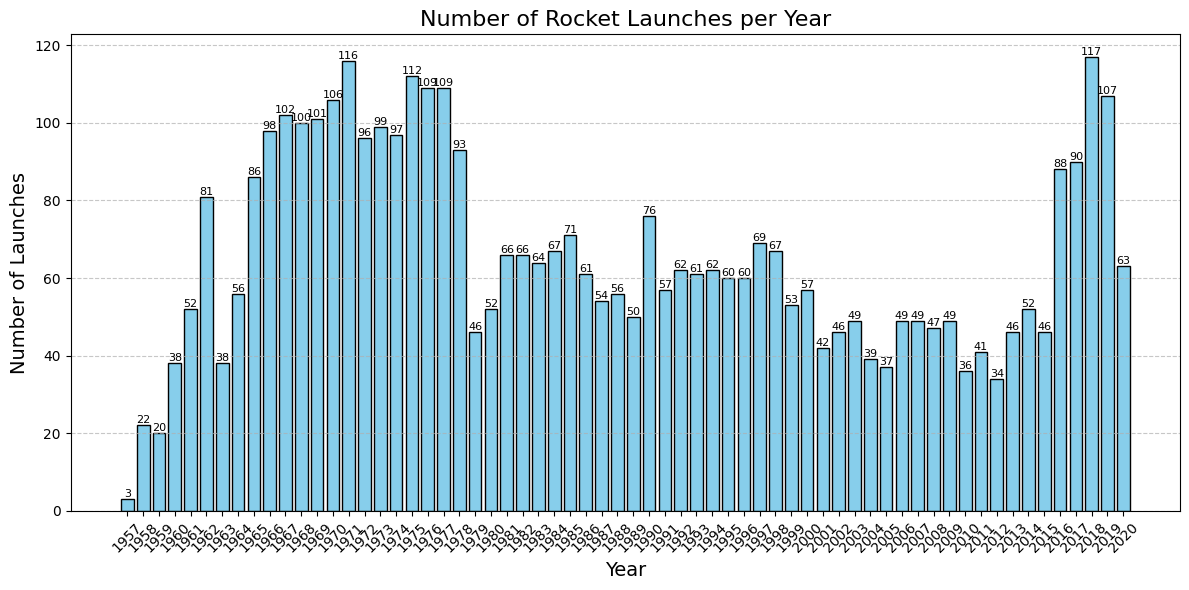

In [112]:
launch_per_year = df_data.Year.value_counts()
launch_per_year = pd.DataFrame({'Year': launch_per_year.index, 'Launches': launch_per_year.values})
# launch_per_year.set_index('Year', inplace=True)

plt.figure(figsize=(12, 6))
bars = plt.bar(launch_per_year['Year'], launch_per_year['Launches'], color='skyblue', edgecolor='black')

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', fontsize=8)

plt.title('Number of Rocket Launches per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.xticks(launch_per_year['Year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [137]:
launch_per_month = df_data.Month.value_counts()
launch_per_month = pd.DataFrame({'Month': launch_per_month.index, 'MoM_Values': launch_per_month.values})
# launch_per_month['MonthName'] = calendar.month_name[launch_per_month['Month'].astype(int)]
launch_per_month.sort_values(by='Month', inplace=True)
print(launch_per_month)

# Calculate rolling average (e.g., 3-month rolling average)
rolling_avg = launch_per_month['MoM_Values'].rolling(window=1).mean()

    Month  MoM_Values
11   1.00         265
9    2.00         323
6    3.00         349
3    4.00         366
10   5.00         320
1    6.00         386
7    7.00         347
4    8.00         358
5    9.00         354
2   10.00         375
8   11.00         325
0   12.00         430


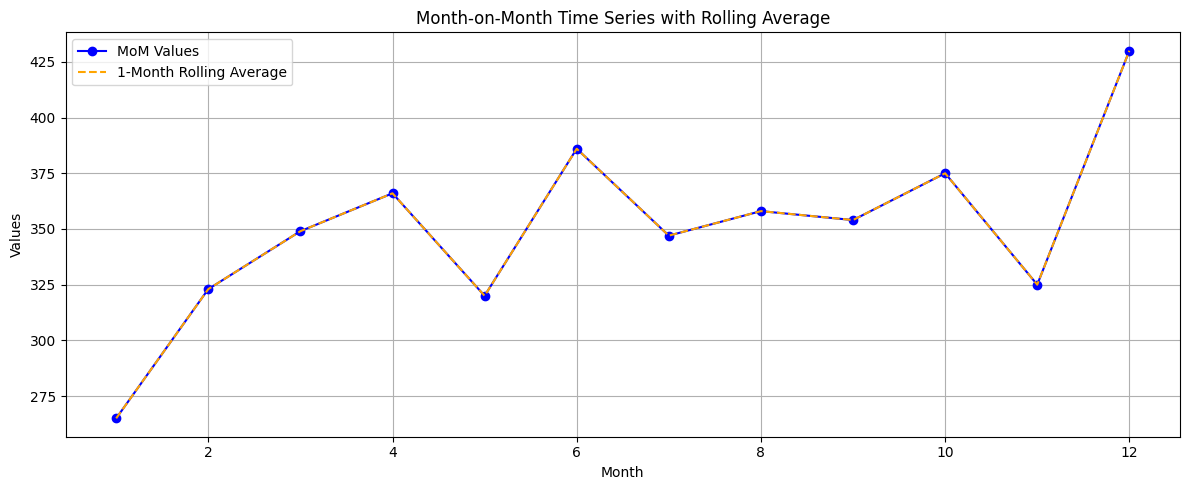

In [138]:
# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(launch_per_month['Month'], launch_per_month['MoM_Values'], label='MoM Values', marker='o', color='blue')
plt.plot(launch_per_month['Month'], rolling_avg, label='1-Month Rolling Average', linestyle='--', color='orange')

plt.title('Month-on-Month Time Series with Rolling Average')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [132]:
maxValues = launch_per_month.max().astype(int)
minValues = launch_per_month.min().astype(int)

popMonth = calendar.month_name[maxValues.Month]
leastMonth = calendar.month_name[minValues.Month]


In [140]:

print(f'Most popular month:{popMonth}')
print(f'Least popular month:{leastMonth}')

Most popular month:December
Least popular month:January


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
launch_price = df_data.groupby(['Year'], as_index=False).agg({'Price': pd.Series.mean})
launch_price.sort_values(by='Year', inplace=True)
launch_price['Price'] = launch_price['Price'].fillna(0)
launch_price.head()

print(launch_price)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(launch_price['Year'], launch_price['Price'], marker='o', linestyle='-', color='b')
plt.title('Average Price of Rocket Launches Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
top_org = df_data.groupby(['Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
top_org.sort_values(by='Mission_Status', inplace=True)
top_org = top_org.tail(10)
print(top_org)

In [ ]:
years = df_data['Year'].unique()
top_org_launches = pd.DataFrame(index=years)

for org in top_org['Organisation']:
    org_data = df_data[df_data['Organisation'] == org]
    org_launches = org_data.groupby('Year').size()
    top_org_launches[org] = org_launches

top_org_launches.fillna(0, inplace=True)
top_org_launches.head()


In [ ]:
plt.figure(figsize=(20, 5))
top_org_launches.plot()
plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation')
plt.grid(True)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
df_coldwar = df_data[(df_data['Year'] <= 1991) & ((df_data['Country']=='USA') | (df_data['Country']=='RUSSIAN FEDERATION'))]


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Country', data=df_coldwar, palette='Set3')
plt.title('USA vs USSR Launches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
df_pie = df_data.groupby(['Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_pie = df_pie[(df_pie['Country'] == 'USA') | (df_pie['Country'] == 'RUSSIAN FEDERATION') | (df_pie['Country'] == 'KAZAKHSTAN')]
df_pie.sort_values(by='Mission_Status', inplace=True)
df_pie.head()

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df_pie['Mission_Status'], labels=df_pie['Country'], autopct='%1.1f%%', startangle=140)
plt.title('USA vs USSR Launches')

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
yOy = df_data.groupby(['Year','Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
yOy.sort_values(by='Year', inplace=True)
yOy = yOy[(yOy['Country'] == 'USA') | (yOy['Country'] == 'RUSSIAN FEDERATION')]
yOy.head()

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='Year', y='Mission_Status', hue='Country', data=yOy, palette='Set2')
plt.title('USA vs USSR Launches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
mission_fail = df_data.groupby(['Year','Country'], as_index=False).agg({'Fail': pd.Series.sum})
mission_fail.sort_values(by='Year', inplace=True)
mission_fail = mission_fail[(mission_fail['Country'] == 'USA') | (mission_fail['Country'] == 'RUSSIAN FEDERATION')]
mission_fail.head()

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='Year', y='Fail', hue='Country', data=mission_fail, palette='Set1')
plt.title('USA vs USSR Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
agg_dict = {
    'Mission_Status': 'count',          # Sum the 'Sales' column
    'Fail': 'sum'       # Find the mean of the 'Quantity' column
}

total_launches = df_data.groupby(['Year', 'Country']).agg(agg_dict).reset_index()
total_launches.sort_values(by='Year', inplace=True)
total_launches = total_launches[(total_launches['Country'] == 'USA') | (total_launches['Country'] == 'RUSSIAN FEDERATION')]


In [ ]:
percentage_fail = (total_launches['Fail'] / total_launches['Mission_Status']) * 100
total_launches['Percentage_Fail'] = percentage_fail
total_launches.head()

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='Year', y='Percentage_Fail', hue='Country', data=total_launches, palette='Set2')
plt.title('USA vs USSR Percentage of Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Failures')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
lead_country = df_data.groupby(['Year', 'Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
lead_country.sort_values(by='Year', inplace=True)
# top_country = lead_country.groupby('Year').apply(lambda x: x.nlargest(1, 'Mission_Status'), include_groups=False)
# top_country.head()
top_country = lead_country.groupby('Year').apply(lambda x: x.loc[x['Mission_Status'].idxmax()]).reset_index(drop=True)
top_country

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='Year', y='Mission_Status', hue='Country', data=top_country, palette='Set1')
plt.title('Lead Country of Launches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
lead_org = df_data.groupby(['Year', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
lead_org.sort_values(by='Year', inplace=True)

In [ ]:
lead_org.head()
lead_org = lead_org.groupby('Year').apply(lambda x: x.loc[x['Mission_Status'].idxmax()]).reset_index(drop=True)
lead_org.head()

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Mission_Status', hue='Organisation', data=lead_org, palette='Set3')
plt.title('Lead Organisation of Launches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()